# Embedding Comparison -  Article Data with Label

In [4]:
import pandas as pd
import numpy as np

In [18]:
# get the label data
#/Users/zechen/Desktop/Capstone/2018_07_19_04_59_08/labels/cave_rescue
label1 = pd.read_csv('2018_07_19_04_59_08/labels/cave_rescue/population.txt', header=None)
label1.columns = ['canonicalUrl']
label1['label'] = 'cave_rescue'
label2 = pd.read_csv('2018_07_19_04_59_08/labels/duckboat/population.txt', header=None)
label2.columns = ['canonicalUrl']
label2['label'] = 'duckboat'
label3 = pd.read_csv('2018_07_19_04_59_08/labels/helsinki_summit/population.txt', header=None)
label3.columns = ['canonicalUrl']
label3['label'] = 'helsinki'
label_df = pd.concat([label1, label2, label3])
label_df.head()

,canonicalUrl,label
0,denverpost.com/2018/07/20/greeley-police-lip-s...,cave_rescue
1,bbc.com/news/av/world-asia-44875089/thai-cave-...,cave_rescue
2,news.google.com/stories/caaqzggkimbdqkltuwpvsm...,cave_rescue
3,chron.com/news/crime/article/young-nubians-rev...,cave_rescue
4,cnbc.com/2018/07/20/at-least-13-die-when-duck-...,cave_rescue


In [31]:
articles_df = pd.read_csv('reliable_raw_articles.csv')
#only_lemma = pd.read_csv('result/only_lemma.csv')

In [39]:
## text normzalization
from nltk.corpus import stopwords
import re
import nltk
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

STOPWORDS = set(stopwords.words('english'))

def clean_text_lemma(text):
    """
        text: a paragrapy
        
        return: modified initial string
    """
    text = re.sub(r"[^\w\s]", '', text) ## Remove all non-word characters (everything except numbers and letters)
    text = text.lower() # lowercase text
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    text_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in text_list]) # lemmatization
    #text_list2 = nltk.word_tokenize(lemmatized_output)
    #stemmed_output = ' '.join([porter.stem(w) for w in text_list2]) #stemming
    return lemmatized_output

In [40]:
articles_df['title_text'] = articles_df['title_text'].apply(clean_text_lemma)

In [41]:
articles_df.to_csv('articles_df_afterlemma_allcolumns.csv')

In [42]:
#merged df and the label_df
merged_df = articles_df.merge(label_df, on='canonicalUrl', how='left')
#drop na labels
merged_df = merged_df.dropna(subset=['label'])
merged_df.head()

,Unnamed: 0,pubId,canonicalUrl,firstScrape,title,text,lang_reliability,title_text,label
12,12,290,zerohedge.com/news/2018-07-19/la-liberals-stag...,7/19/2018 7:50:19 PM -04:00,"LA Liberals Stage ""Emergency Protest"" At Koshe...","by Phoenix Capita… - Jul 19, 2018 8:49 am ### ...",1,la liberal stage emergency protest at kosher c...,helsinki
23,23,290,zerohedge.com/news/2018-07-19/wells-fargo-has-...,7/19/2018 11:53:37 AM -04:00,Wells Fargo Caught In Yet Another Scandal | Ze...,"by Phoenix Capita… - Jul 19, 2018 8:49 am ### ...",1,well fargo caught in yet another scandal zero ...,helsinki
30,30,290,zerohedge.com/news/2018-07-19/white-house-aske...,7/20/2018 1:35:15 AM -04:00,"Asked 8 Times For Trump-Rouhani Meeting, Iran...","by Phoenix Capita… - Jul 19, 2018 8:49 am ### ...",1,asked 8 time for trumprouhani meeting iran say...,helsinki
34,34,290,zerohedge.com/news/2018-07-18/wheres-panic-why...,7/19/2018 8:26:52 AM -04:00,"""Where’s The Panic"": Why Trade War Hedges Aren...","by Knave Dave - Jul 18, 2018 1:11 pm ### This ...",1,wheres the panic why trade war hedge arent wor...,helsinki
53,53,290,zerohedge.com/news/2018-07-19/maxine-waters-fe...,7/19/2018 1:03:04 PM -04:00,"Maxine Waters Fears ""Armed Protests"" As Oath K...","by Phoenix Capita… - Jul 19, 2018 8:49 am ### ...",1,maxine water fear armed protest a oath keeper ...,cave_rescue


In [177]:
merged_df.shape

(635, 9)

In [180]:
merged_df.to_csv('merged_df_labeled.csv')

## BERT Embedding

### BERT Embedding (max_seq_length = 500)

In [49]:
article_lst = np.array(merged_df.title_text).tolist()

In [50]:
from bert_embedding import BertEmbedding

In [55]:
bert_embedding = BertEmbedding(max_seq_length = 500)

In [56]:
bert_embedding_tiltetext = bert_embedding(article_lst)

In [65]:
len(bert_embedding_tiltetext[0][1][0])

768

In [74]:
len(bert_embedding_tiltetext[0][0])

421

In [80]:
len(bert_embedding_tiltetext[0][1])

421

In [90]:
acc = []
i = 0
missing_article = []
for article in bert_embedding_tiltetext:
    if len(article[0])!=0:
        acc.append(sum(article[1])/len(article[0]))
    else:
        missing_article.append(i)
        acc.append(np.array([0]*768))
    i+=1

In [91]:
missing_article

[592]

In [93]:
BERT_result = pd.DataFrame(acc)

In [94]:
BERT_result.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.192768,-0.026544,0.323936,-0.127815,0.169863,-0.242644,-0.024715,0.437464,0.186504,-0.150674,...,-0.176677,-0.238046,0.128752,0.030821,0.091377,-0.165285,-0.323293,-0.185531,0.202142,-0.058038
1,-0.288682,-0.083886,0.294659,-0.036016,0.416384,-0.116388,-0.155365,0.330031,0.045767,0.020945,...,-0.120747,-0.206864,0.122139,-0.177209,0.043031,-0.269280,-0.192017,-0.185953,0.026664,-0.028860
2,-0.426343,-0.036083,0.211354,-0.119518,0.122639,-0.410995,-0.126041,0.455900,0.165857,-0.104262,...,-0.015152,-0.076911,0.213020,-0.145302,0.093698,-0.402866,-0.275426,-0.327661,0.125807,-0.103954
3,-0.338525,-0.099038,0.351303,-0.021412,0.245589,-0.166535,-0.137005,0.442317,0.104406,-0.226562,...,-0.155969,-0.263251,0.125150,-0.009667,-0.063565,-0.162738,-0.217384,-0.213890,0.100759,-0.170836
4,-0.251480,-0.132631,0.235767,-0.149800,0.197308,-0.169006,0.090826,0.299525,0.042767,-0.140542,...,-0.268958,-0.185185,0.173765,-0.069759,-0.053110,-0.220305,-0.199981,-0.198973,0.026976,-0.078080


In [98]:
BERT_result.to_csv('BERT_result_645labels.csv')

In [99]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(BERT_result)

In [102]:
X_embedded.shape

(635, 2)

In [105]:
df1 = pd.DataFrame(X_embedded)

In [106]:
df2 = merged_df[['label']]

In [109]:
df1.shape

(635, 2)

In [110]:
df2.shape

(635, 1)

In [130]:
d = {'col1': df1.iloc[:,0], 'col2': df1.iloc[:,1], 'col3': df2.reset_index().label}
df = pd.DataFrame(data=d)

In [148]:
df_helsinki = df[df.col3=='helsinki']
df_cave_rescue = df[df.col3=='cave_rescue']
df_duckboat = df[df.col3=='duckboat']

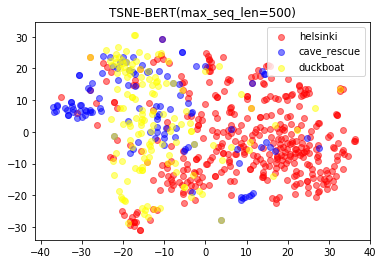

In [153]:
import matplotlib.pyplot as plt

plt.scatter(df_helsinki.col1, df_helsinki.col2, c = 'red', label='helsinki', alpha=0.5)
plt.scatter(df_cave_rescue.col1, df_cave_rescue.col2, c = 'blue', label='cave_rescue', alpha=0.5)
plt.scatter(df_duckboat.col1, df_duckboat.col2, c = 'yellow', label='duckboat', alpha=0.5)
plt.legend()
plt.title('TSNE-BERT(max_seq_len=500)')
plt.show()

### BERT Embedding (max_seq_length = 300)

In [5]:
merged_df = pd.read_csv('merged_df_labeled.csv')
merged_df_dropnan = merged_df.drop([592])
merged_df_dropnan.shape

(634, 10)

In [6]:
article_lst = np.array(merged_df_dropnan.title_text).tolist()

In [6]:
from bert_embedding import BertEmbedding
bert_embedding = BertEmbedding(max_seq_length = 300)

In [7]:
bert_embedding_tiltetext_300 = bert_embedding(article_lst)

In [8]:
acc = []
i = 0
missing_article = []
for article in bert_embedding_tiltetext_300:
    if len(article[0])!=0:
        acc.append(sum(article[1])/len(article[0]))
    else:
        missing_article.append(i)
        acc.append(np.array([0]*768))
    i+=1

In [9]:
BERT_result_len300 = pd.DataFrame(acc)

In [19]:
BERT_result_len300.to_csv('BERT_result/BERT_result_len300_dropnan.csv')

In [10]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(BERT_result_len300)

In [11]:
df1 = pd.DataFrame(X_embedded)
df2 = merged_df_dropnan[['label']]
assert df1.shape[0] == df2.shape[0]

In [12]:
d = {'col1': df1.iloc[:,0], 'col2': df1.iloc[:,1], 'col3': df2.reset_index().label}
df = pd.DataFrame(data=d)
df_helsinki = df[df.col3=='helsinki']
df_cave_rescue = df[df.col3=='cave_rescue']
df_duckboat = df[df.col3=='duckboat']

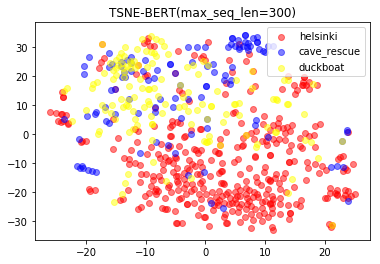

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df_helsinki.col1, df_helsinki.col2, c = 'red', label='helsinki', alpha=0.5)
plt.scatter(df_cave_rescue.col1, df_cave_rescue.col2, c = 'blue', label='cave_rescue', alpha=0.5)
plt.scatter(df_duckboat.col1, df_duckboat.col2, c = 'yellow', label='duckboat', alpha=0.5)
plt.legend()
plt.title('TSNE-BERT(max_seq_len=300)')
plt.show()

### BERT Embedding (max_seq_length = 700)

In [1]:
from bert_embedding import BertEmbedding
bert_embedding = BertEmbedding(max_seq_length = 600)

In [7]:
assert len(article_lst) == 634
bert_embedding_tiltetext_700 = bert_embedding(article_lst)

In [ ]:
bert_embedding_tiltetext_700

### BERT Embedding - Pretrained Model

In [273]:
merged_df = pd.read_csv('merged_df_labeled.csv')

In [272]:
bert_embedding_pretrained = BertEmbedding(max_seq_length = 500, model='bert_24_1024_16', 
                                          dataset_name='book_corpus_wiki_en_cased')

In [281]:
i=0
for item in article_lst:
    if isinstance(item, float):
        print(item)
        print(i)
    i+=1

nan
592


In [291]:
merged_df_dropnan = merged_df.drop([592])

In [293]:
merged_df_dropnan.shape

(634, 10)

In [296]:
article_lst = np.array(merged_df_dropnan.title_text).tolist()
len(article_lst)

634

In [297]:
bert_embedding_tiltetext_pretrained = bert_embedding(article_lst)

In [303]:
len(bert_embedding_tiltetext_pretrained)

634

In [307]:
acc = []
i = 0
missing_article = []
for article in bert_embedding_tiltetext_pretrained:
    if len(article[0])!=0:
        acc.append(sum(article[1])/len(article[0]))
    else:
        missing_article.append(i)
        acc.append(np.array([0]*768))
    i+=1

In [309]:
BERT_result_pretrained = pd.DataFrame(acc)

In [311]:
BERT_result_pretrained.shape

(634, 768)

In [312]:
from sklearn.manifold import TSNE
X_embedded_pretrained = TSNE(n_components=2).fit_transform(BERT_result_pretrained)

In [313]:
df1 = pd.DataFrame(X_embedded_pretrained)

Drop the 592th row (missing tilte and article)

In [324]:
merged_df.iloc[592,:]

Unnamed: 0                                                     201735
Unnamed: 0.1                                                   203696
pubId                                                             329
canonicalUrl        ft.com/content/0a7782e8-8b6b-11e8-bf9e-8771d54...
firstScrape                               7/19/2018 3:20:58 PM -04:00
title                                                             NaN
text                                                              NaN
lang_reliability                                                    1
title_text                                                        NaN
label                                                        helsinki
Name: 592, dtype: object

In [333]:
df2 = merged_df_dropnan[['label']]

In [334]:
d = {'col1': df1.iloc[:,0], 'col2': df1.iloc[:,1], 'col3': df2.reset_index().label}
df = pd.DataFrame(data=d)

In [335]:
df.head()

,col1,col2,col3
0,-0.060628,-1.346353,helsinki
1,22.882030,5.902275,helsinki
2,8.388510,-20.412390,helsinki
3,19.762444,7.876220,helsinki
4,0.488417,-2.207754,cave_rescue


In [336]:
df_helsinki = df[df.col3=='helsinki']
df_cave_rescue = df[df.col3=='cave_rescue']
df_duckboat = df[df.col3=='duckboat']

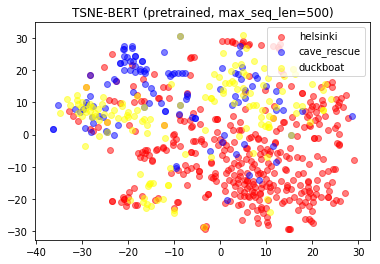

In [337]:
import matplotlib.pyplot as plt

plt.scatter(df_helsinki.col1, df_helsinki.col2, c = 'red', label='helsinki', alpha=0.5)
plt.scatter(df_cave_rescue.col1, df_cave_rescue.col2, c = 'blue', label='cave_rescue', alpha=0.5)
plt.scatter(df_duckboat.col1, df_duckboat.col2, c = 'yellow', label='duckboat', alpha=0.5)
plt.legend()
plt.title('TSNE-BERT (pretrained, max_seq_len=500)')
plt.show()

# Doc2Vec Embedding

In [219]:
doc2Vec_embedding = pd.read_csv('result/Doc2Vec_embedding_output.csv', index_col=0)

In [220]:
doc2Vec_embedding.shape

(211577, 100)

In [223]:
merged_df = pd.read_csv('merged_df_labeled.csv',index_col=0)

In [224]:
merged_df= merged_df[['label']]

In [225]:
merged_df = merged_df.reset_index()
doc2Vec_embedding = doc2Vec_embedding.reset_index()

In [229]:
merged_df_labelled = merged_df.merge(doc2Vec_embedding, on="index", how = "left")
merged_df_labelled.head()

,index,label,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,12,helsinki,-2.041374,-0.186289,-1.744696,0.622102,-3.584465,1.053855,0.992697,-0.009612,...,0.826988,-0.239550,3.144722,-2.163226,-0.828425,-2.777707,0.477877,-2.744538,1.223777,-3.979551
1,23,helsinki,-1.331344,0.614388,-0.869905,1.796097,-0.714029,0.944742,1.191334,2.457072,...,2.844636,2.139019,2.564189,-0.620157,-3.418683,-2.095523,1.199862,-0.324513,1.600830,-0.755099
2,30,helsinki,-2.958684,-3.058017,1.207473,1.698571,1.868999,-2.962488,0.517093,0.870659,...,3.279486,1.282286,-0.701011,-0.575856,-2.646378,-3.110602,1.856869,-4.111384,0.276120,-2.152300
3,34,helsinki,-1.121757,-0.942920,-2.538819,0.653278,2.493861,1.843876,-0.184506,-2.659613,...,2.721487,0.902423,-1.818344,-0.696070,-5.202574,-2.660053,-2.585590,0.515361,-1.114303,-0.719428
4,53,cave_rescue,-1.087978,-0.871060,0.193154,2.456863,-1.786977,2.155005,-0.919569,2.127806,...,4.219577,-1.558684,-2.124028,-0.862770,0.303475,-2.019815,1.370067,0.251273,0.358808,-1.388796


In [232]:
from sklearn.manifold import TSNE

df_tsne = merged_df_labelled.iloc[:,2:]
doc2vec_tsne = TSNE(n_components=2).fit_transform(df_tsne)

In [244]:
tsne_df = pd.DataFrame(doc2vec_tsne)

df = pd.concat([tsne_df,merged_df_labelled.iloc[:,1]], axis=1)
df.head()

,0,1,label
0,90.370941,-20.613350,helsinki
1,15.374994,35.428413,helsinki
2,77.604950,6.463249,helsinki
3,-25.648840,44.174423,helsinki
4,72.513992,-47.516190,cave_rescue


In [245]:
df_helsinki = df[df.label=='helsinki']
df_cave_rescue = df[df.label=='cave_rescue']
df_duckboat = df[df.label=='duckboat']

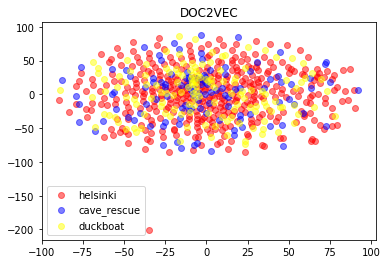

In [270]:
import matplotlib.pyplot as plt

plt.scatter(df_helsinki.iloc[:,0], df_helsinki.iloc[:,1], c = 'red', label='helsinki', alpha=0.5)
plt.scatter(df_cave_rescue.iloc[:,0], df_cave_rescue.iloc[:,1], c = 'blue', label='cave_rescue', alpha=0.5)
plt.scatter(df_duckboat.iloc[:,0], df_duckboat.iloc[:,1], c = 'yellow', label='duckboat', alpha=0.5)
plt.legend()
plt.title('DOC2VEC')
plt.show()

# XLNET Embedding

In [ ]:
from embedding_as_service.text.encode import Encoder  
en = Encoder(embedding='bert', model='bert_base_cased', download=True)  